# Group 2. Diterpene project

## Ege Yolsal, Andrei Brasoveanu, Darius Gražulis
### 01634257, 12045444, 12045116

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
df = pd.read_csv("diterpene_shuf.csv")

For our practical coursework assignment, you will be working on a problem in natural product chemistry. More precisely, we provide you with a dataset comprising nuclear magnetic resonance (NMR) spectroscopy data for a certain set of organic compounds, so-called diterpenes. Diterpenes belong to the class of terpenes, which are molecules with a carbon skeleton and the formula (C5H8)n. They constitute a major component of essential oils in certain plants and often exhibit interesting medical properties. NMR spectroscopy is a commonly employed method to determine the chemical structure of a compound, something that is referred to as structure elucidation. In NMR experiments, molecules are placed in a strong magnetic field, resulting in the molecules resonating at a specific frequency. These frequencies can then be used to infer information about the molecules' chemical structures. The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure. For a more detailed description of the classification task and the data, please refer to the original paper by Dzeroski et al. as well as a summary thereof.



Each instance is described by:

    the first four numbers are expert designed features (you can ignore them for the classification task),
    the next item is an ID,
    then we have a number of resonance frequencies with their "multiplicity", and
    finally the class.



In [3]:
df.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,t,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,d,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,d,154.6,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


In [4]:
df = df.drop(["a0","a1","a2","a3"], axis=1)
df = df.rename(columns={"a4": "ID", "a45c": "Class"})

In [25]:
df.head()

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


<AxesSubplot:xlabel='Class', ylabel='count'>

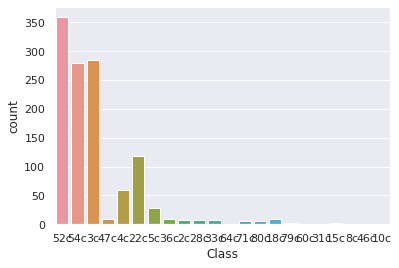

In [26]:
sns.countplot(x = 'Class', data=df)

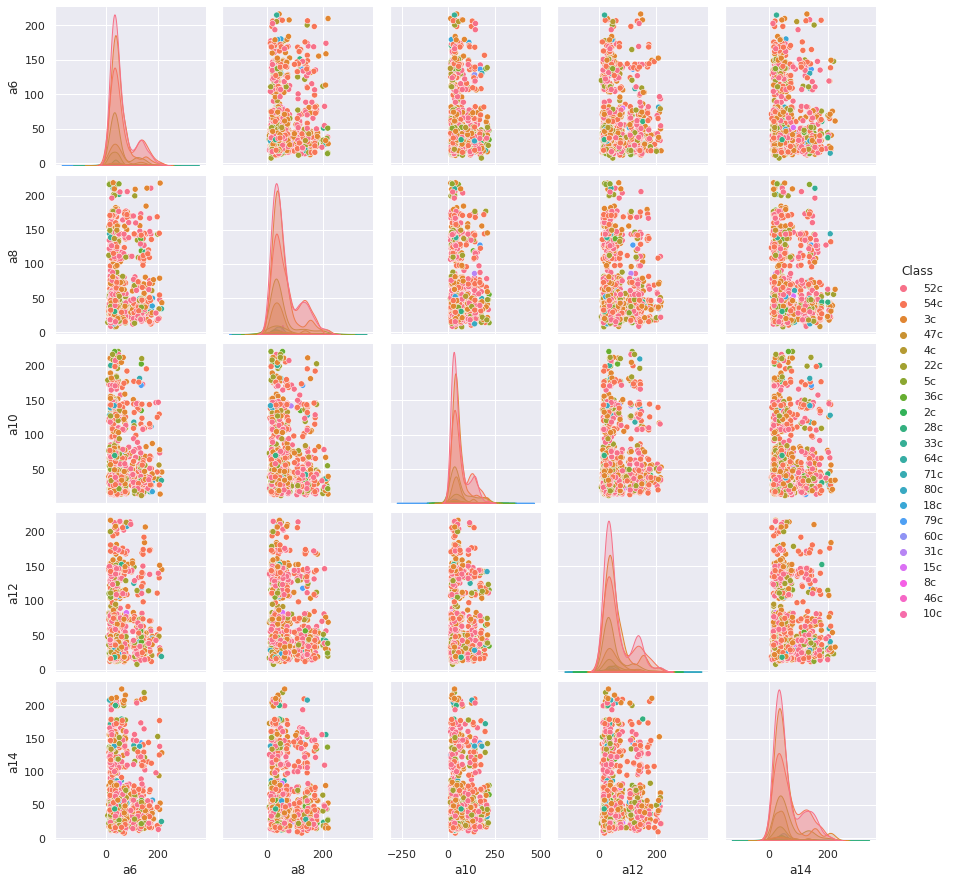

In [38]:
tmp = df[["a5", 'a6', "a7", "a8", "a9" , "a10", "a11" , "a12", "a13" ,"a14", "Class"]]
sns.pairplot(tmp, hue="Class")

In [6]:
df.shape

(1202, 42)

In [7]:
df.a5.unique()

array(['t', 'd', 'q', 's'], dtype=object)

In [8]:
df.Class.unique()

array(['52c', '54c', '3c', '47c', '4c', '22c', '5c', '36c', '2c', '28c',
       '33c', '64c', '71c', '80c', '18c', '79c', '60c', '31c', '15c',
       '8c', '46c', '10c'], dtype=object)

In [9]:
df.describe()

,a6,a8,a10,a12,a14,a16,a18,a20,a22,a24,a26,a28,a30,a32,a34,a36,a38,a40,a42,a44
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,56.387155,59.147687,59.999551,58.874193,59.536389,59.597471,57.309401,58.728378,55.568128,57.278544,58.794725,56.415308,61.136672,59.793536,58.655524,60.627945,58.849384,57.287329,60.231140,57.614401
std,43.868545,45.930797,46.909051,45.465840,46.522244,45.921470,43.398889,44.909447,43.476958,45.148903,46.448512,44.489723,47.351395,44.805028,45.697774,46.396705,46.498059,44.742240,47.950173,44.897128
min,7.300000,7.900000,11.600000,7.500000,7.700000,7.500000,7.600000,9.200000,7.500000,6.800000,11.800000,11.600000,8.000000,7.600000,2.400000,7.800000,7.900000,8.100000,7.900000,7.700000
25%,27.800000,28.200000,27.725000,28.425000,27.700000,28.725000,27.875000,28.302500,28.050000,28.100000,26.625000,27.025000,28.550000,30.300000,28.700000,30.625000,28.300000,27.302500,28.225000,28.225000
50%,39.600000,41.400000,41.200000,40.400000,41.300000,41.000000,39.925000,40.500000,39.600000,40.400000,40.215000,39.500000,41.400000,41.200000,40.700000,42.000000,40.050000,39.700000,40.700000,40.400000
75%,66.700000,71.800000,73.187500,72.700000,72.975000,72.175000,71.975000,72.100000,64.160000,65.775000,71.900000,65.375000,74.600000,72.600000,69.900000,72.575000,71.175000,68.825000,72.075000,70.200000
max,216.630000,219.100000,220.700000,216.900000,224.700000,221.250000,223.000000,222.700000,222.100000,218.300000,222.500000,215.270000,220.200000,216.900000,218.000000,216.400000,224.500000,216.100000,217.460000,219.300000


In [46]:
df.isnull().values.any()

False

<AxesSubplot:>

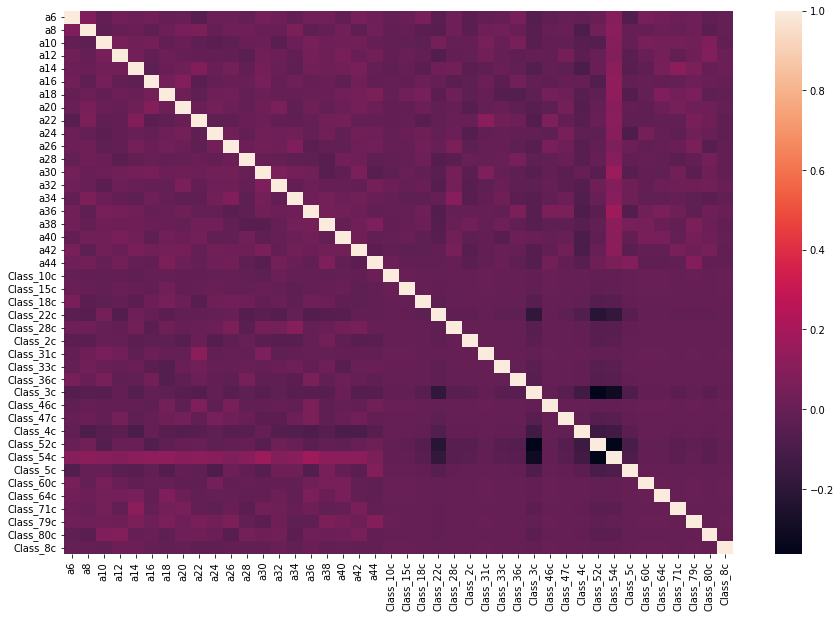

In [10]:
df_target_onehot = pd.get_dummies(df, columns=['Class'])
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_target_onehot.corr())

# Neural Network (with linear layers) - pytorch

In [11]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class DieterDataset():

    def __init__(self, csv_file):
        """Initializes instance of class DieterDataset.
        Args:
            csv_file (str): Path to the csv file with the dieter data.
        """
        df = pd.read_csv(csv_file)

        # Grouping variable names
        self.categorical = ["a5", "a7", "a9", 
                            "a11", "a13", "a15", "a17", "a19", 
                            "a21", "a23", "a25", "a27", "a29", 
                            "a31", "a33", "a35", "a37", "a39"]
        self.target = "math score"

        # One-hot encoding of categorical variables
        self.students_frame = pd.get_dummies(df, prefix=self.categorical)

        # Save target and predictors
        self.X = self.students_frame.drop(self.target, axis=1)
        self.y = self.students_frame[self.target]

    def __len__(self):
        return len(self.students_frame)

    def __getitem__(self, idx):
        # Convert idx from tensor to list due to pandas bug (that arises when using pytorch's random_split)
        if isinstance(idx, torch.Tensor):
            idx = idx.tolist()

        return [self.X.iloc[idx].values, self.y[idx]]

# Neural Network using pytorch-tabular

In [12]:
# this cell is used to create at least one sample from each class in both training and test sets
# there are some classes which only have one sample present in the dataset so we cannot stratify otherwise
def get_min_required_rows(test_size=0.2):
    return 1 / test_size

class_to_counts = df['Class'].value_counts()
df['Sameclass'] = df['Class'].apply(lambda y: class_to_counts[y])
    
min_required_rows = get_min_required_rows(0.2)
copy_rows = df[df['Sameclass'] < min_required_rows].copy(deep=True)
valid_rows = df[df['Sameclass'] >= min_required_rows].copy(deep=True)
              
X = valid_rows['ID'].tolist()
y = valid_rows['Class'].tolist()
    
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)


X_test = X_test + copy_rows['ID'].tolist()
X_train = X_train + copy_rows['ID'].tolist()

df.drop(['Sameclass'], axis=1, inplace=True)

test_df = df[df['ID'].isin(X_test)].copy(deep=True)
train_df = df[df['ID'].isin(X_train)].copy(deep=True)

print (f"number of rows in the original dataset: {len(df)}")

test_prop = round(len(test_df) / len(df) * 100, 2)
train_prop = round(len(train_df) / len(df) * 100, 2)
print (f"number of rows in the splits: {len(train_df)} ({train_prop}%), {len(test_df)} ({test_prop}%)")

number of rows in the original dataset: 1202
number of rows in the splits: 963 (80.12%), 249 (20.72%)


In [13]:
Counter(train_df['Class'])

Counter({'52c': 287,
         '54c': 224,
         '3c': 228,
         '47c': 8,
         '4c': 47,
         '22c': 95,
         '5c': 22,
         '36c': 8,
         '2c': 6,
         '28c': 6,
         '33c': 6,
         '64c': 1,
         '71c': 4,
         '80c': 4,
         '18c': 8,
         '79c': 2,
         '60c': 1,
         '31c': 1,
         '15c': 2,
         '8c': 1,
         '46c': 1,
         '10c': 1})

In [14]:
from collections import Counter
Counter(test_df['Class'])

Counter({'54c': 56,
         '52c': 72,
         '4c': 12,
         '3c': 57,
         '5c': 6,
         '36c': 2,
         '22c': 24,
         '64c': 1,
         '71c': 1,
         '2c': 1,
         '28c': 2,
         '47c': 2,
         '79c': 2,
         '18c': 2,
         '60c': 1,
         '31c': 1,
         '15c': 2,
         '33c': 1,
         '8c': 1,
         '46c': 1,
         '10c': 1,
         '80c': 1})

In [15]:
train_df = train_df.drop(['ID'], axis = 1)

test_df = test_df.drop(['ID'], axis = 1)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()     
train_df["Class"] = le.fit_transform(train_df["Class"]) 

In [17]:
train_df

,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,t,139.2,q,33.2,d,30.7,d,49.6,t,38.6,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,13
1,d,144.0,q,66.7,d,46.2,t,32.7,q,19.1,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,14
3,t,37.2,t,17.4,q,16.7,s,58.1,t,41.6,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,9
4,q,12.2,d,154.6,t,18.7,t,37.1,t,79.1,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,9
5,q,33.3,q,173.8,d,146.0,q,107.8,s,38.9,...,55.5,t,56.1,t,53.9,s,44.8,t,37.5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,q,18.8,t,32.5,d,143.1,q,15.7,t,117.9,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,14
1198,q,60.6,t,29.3,t,38.7,d,47.6,q,16.4,...,59.1,s,39.7,d,142.6,q,18.8,d,36.2,14
1199,q,166.1,q,62.5,s,34.6,t,37.9,q,22.6,...,44.5,d,55.6,d,147.3,q,107.0,t,47.1,13
1200,t,36.5,d,46.4,t,27.5,t,35.5,q,15.7,...,17.3,t,120.4,q,17.8,d,144.4,t,35.9,14


In [20]:
test_df

,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
2,d,30.7,t,26.80,t,41.20,t,139.30,q,19.80,...,16.70,t,35.40,q,65.80,s,42.40,d,139.80,54c
9,d,93.5,q,111.00,t,34.80,t,214.50,d,57.50,...,18.10,s,41.70,q,16.70,t,143.90,q,27.60,52c
15,s,39.6,q,16.02,s,50.49,t,17.57,t,32.14,...,37.41,t,31.45,t,19.03,t,71.58,q,17.78,4c
16,t,156.7,d,144.20,q,195.50,t,29.30,s,55.90,...,202.80,q,25.60,d,35.50,t,126.50,t,73.00,54c
19,t,19.7,s,36.20,t,28.90,t,42.80,q,11.70,...,42.20,q,110.30,d,74.80,q,28.80,d,55.90,52c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,q,17.8,t,17.80,t,56.50,s,48.10,t,17.80,...,43.70,q,18.90,s,39.00,t,35.30,s,37.60,3c
1176,s,52.1,s,47.70,t,212.20,s,38.50,t,142.50,...,127.10,t,34.50,d,53.10,t,37.00,t,215.80,22c
1178,q,15.7,q,171.30,d,77.10,d,42.50,s,42.40,...,28.90,d,36.70,q,171.70,q,21.00,t,76.00,54c
1183,t,74.6,q,15.40,q,17.30,t,143.70,t,20.60,...,35.00,t,44.60,t,108.20,s,46.50,t,138.30,54c


In [19]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig

data_config = DataConfig(
    target=['Class'],
    continuous_cols = ["a6", "a8", "a10", 
                        "a12", "a14", "a16", "a18", "a20", 
                        "a22", "a24", "a26", "a28", "a30", 
                        "a32", "a34", "a36", "a38", "a40",
                        "a42", "a44"], 
    
    categorical_cols = ["a5", "a7", "a9", 
                        "a11", "a13", "a15", "a17", "a19", 
                        "a21", "a23", "a25", "a27", "a29", 
                        "a31", "a33", "a35", "a37", "a39",
                        "a41", "a43"]
)
trainer_config = TrainerConfig(
    auto_lr_find = True, 
    batch_size = 32,
    max_epochs = 100,
    gpus = 0, # index of the GPU to use. 0 means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="80-160-160-23",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train=train_df)
# result = tabular_model.evaluate(test_df)

Global seed set to 42


ValueError: y contains previously unseen labels: [6]

# LOGISTIC REGRESSION

In [39]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

train_X = train_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

test_X = df.iloc[1050:,1:-1]



test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

test_X = test_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.92544832e-04, 5.19153953e-05, 2.05167145e-03, ...,
        1.74328419e-10, 1.42059203e-05, 2.43335842e-03],
       [5.11386605e-06, 1.09791270e-03, 3.20068250e-03, ...,
        1.10403409e-17, 9.14026021e-10, 1.88607253e-01],
       [6.28451790e-04, 2.16816643e-05, 3.71529264e-02, ...,
        2.56901794e-06, 1.19890759e-08, 1.12613546e-04],
       ...,
       [8.48164596e-05, 8.44890344e-07, 1.65558439e-03, ...,
        3.19741242e-12, 6.66997469e-10, 5.90756851e-07],
       [2.13484594e-05, 6.58919584e-06, 1.31111378e-04, ...,
        3.75435649e-05, 1.83215503e-03, 1.47799852e-05],
       [2.77428484e-07, 7.94768326e-04, 6.58694489e-06, ...,
        5.08743143e-05, 1.51584163e-14, 4.95051442e-04]])

In [41]:
tmp = df[df["Class"].isin(["52c","54c","3c"])]

accuracy_score(test_Y, predictions)

0.28289473684210525

In [128]:
tmp = df[df["Class"].isin(["22c"])]
tmp

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
17,v931,t,22.90,s,38.80,t,147.70,t,19.10,d,...,128.10,t,19.40,q,34.50,s,38.80,t,39.70,22c
20,v1587,s,46.40,q,177.40,t,202.90,t,40.20,d,...,21.70,t,142.70,s,44.00,t,121.90,q,21.50,22c
34,v1083,d,43.50,t,23.90,q,33.50,q,22.70,q,...,24.40,t,33.50,s,49.80,t,18.80,t,44.10,22c
47,v1583,d,48.30,t,38.50,q,178.00,q,22.30,d,...,150.10,s,38.50,s,35.00,t,19.30,q,28.10,22c
57,v1263,d,38.83,q,70.90,t,28.11,t,39.56,s,...,18.38,q,18.47,q,27.63,t,69.39,d,142.43,22c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,v1265,t,18.19,t,37.65,d,127.13,q,111.13,s,...,21.58,t,29.67,t,35.99,q,17.55,t,72.94,22c
1166,v1711,t,51.57,q,16.21,s,36.43,t,35.74,t,...,27.08,d,57.21,t,39.59,q,24.28,t,38.13,22c
1169,v188,q,110.89,q,13.21,q,18.37,t,39.07,q,...,182.75,t,147.92,t,19.60,d,135.79,t,37.33,22c
1176,v1228,s,52.10,s,47.70,t,212.20,s,38.50,t,...,127.10,t,34.50,d,53.10,t,37.00,t,215.80,22c


In [124]:
df["Class"].unique()

array(['52c', '54c', '3c', '47c', '4c', '22c', '5c', '36c', '2c', '28c',
       '33c', '64c', '71c', '80c', '18c', '79c', '60c', '31c', '15c',
       '8c', '46c', '10c'], dtype=object)

# KNN

{'k': 6, 'accuracy': 0.6285714285714286}


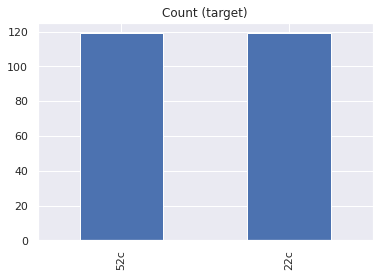

In [142]:
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score

tmp = df[df["Class"].isin(["52c","22c"])]

count_class_0, count_class_1 = tmp.Class.value_counts()

df_class_52c = tmp[tmp['Class'] == "52c"]
df_class_22c = tmp[tmp['Class'] == "22c"]

df_class_52c_under = df_class_52c.sample(count_class_1)
df_test_under = pd.concat([df_class_52c_under, df_class_22c], axis=0)

df_test_under.Class.value_counts().plot(kind='bar', title='Count (target)');

train_X = tmp.iloc[:400,1:-1]
train_Y = tmp.iloc[:400,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

scaler = preprocessing.MaxAbsScaler().fit(train_X)
X_scaled = scaler.transform(train_X)


test_X = tmp.iloc[400:,1:-1]
test_Y = tmp.iloc[400:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

test_X_scaled = scaler.transform(test_X)


k_range = range(1, 50)
k_scores = []
results = []

# neigh = KNeighborsClassifier(n_neighbors=20)

# cv = LeaveOneOut()

# scores = cross_val_score(neigh, train_X, train_Y, scoring='accuracy',
#                          cv=cv, n_jobs=-1)

# np.mean(abs(scores))
for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_scaled, train_Y)
    predictions = neigh.predict(test_X_scaled)
#     print(k)
#     print(accuracy_score(test_Y, predictions))
    #f1_score(y_true, y_pred, average='macro')
    result = {'k':k,'accuracy':f1_score(test_Y, predictions, average='macro')}
    results.append(result)
    
print(max(results, key=lambda x:x['accuracy']))
#max(ages, key=ages.get)


In [43]:
accuracy_score(test_Y, predictions)

0.35526315789473684

# DECISION TREE

In [44]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])



test_X = df.iloc[1050:,1:-1]
test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
predictions = clf.predict(test_X)

In [45]:
accuracy_score(test_Y, predictions)

0.25